<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/nifty100_Above_50EMA_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
START = "2017-01-01"  #yyyy-mm-dd
#END = end_date
lst= []

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=90d9218e63c57284f88ca7fa6c8e81f3e9c0f3f59745904c922eca074125395b
  Stored in directory: /tmp/pip-ephem-wheel-cache-hcl_xg89/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/STOCKS100.txt', sep='\t')
nifty100 = data['yahoo finance ticker'].tolist()
nifty =yf.download('^NSEI', start=START)
nifty['pct_chg']=nifty['Close'].pct_change(90)*100

[*********************100%***********************]  1 of 1 completed


# Download From Quandl

In [3]:
import seaborn as sns

In [4]:
#@title #####download
for i in range(len(nifty100)):
  dfi = yf.download(nifty100[i], start=START)
  
  dfi = dfi.dropna()
 
  lst.append(dfi)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- INFRATEL-EQ.

In [5]:
#@title #####draw plot code
def draw_plot(labels,df,nifty):
  
  buy,sell,buy20,sell20=plot_buy_sell_signal(df)
  fig, ax = plt.subplots(4,1, figsize=(15,9),sharex=True)
  ax[0].plot(df.loc[:, :].index, df.loc[:, 'sum'], label=labels)
  ax[2].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
  #ax[2].scatter(nifty.iloc[buy].index,nifty.iloc[buy].Close,marker='^',label='Buy',color='g')
  #ax[2].scatter(nifty.iloc[sell].index,nifty.iloc[sell].Close,marker='v',label='Sell',color='r')
  ax[2].plot(nifty['Close'].ewm(span=50,adjust=False).mean())
  ax[0].plot(df['sum'].ewm(span=50, adjust=False).mean(),linewidth=2, markersize=4 ,label='50EMA' ,color='r')
  ax[0].plot(df['sum'].ewm(span=20, adjust=False).mean(),linewidth=1, markersize=4 ,label='20EMA' ,color='g')
  ax[1].plot(df['macd'],label='MACD100')
  ax[1].plot(df['signal'],label='Signal100')
  ax[3].plot(df['macd20'],label='MACD50')
  ax[3].plot(df['signal20'],label='Signal50')
  #ax[2].scatter(nifty.iloc[buy20].index,nifty.iloc[buy20].Close,marker='*',label='Buy',color='g')
  #ax[2].scatter(nifty.iloc[sell20].index,nifty.iloc[sell20].Close,marker='*',label='Sell',color='r')
  #ax[1].hist(df['hist'],label='Histogram')
  ax[0].legend(loc='upper left')
  ax[0].set_ylabel(labels)
  ax[1].legend('MACD')
  ax[1].legend(loc='best')
  ax[2].legend('Nifty')
  ax[0].axhline(y=50 , color ='r')
  #ax[0].axhline(y=80 , color ='c')
  #ax[0].axhline(y=40 , color ='b')
  #ax[0].axhline(y=20 , color ='g')
  ax[1].axhline(y=0 , color='r')
  fig.suptitle(labels)
  plt.show()

In [6]:
#@title #####get indicators code
def get_indicators(ema,lst=lst):
  dlix=[]
  for i in range(len(lst)):
    dlix.append(lst[i].Close)

  df = pd.DataFrame(dlix).T
  namelist =[]
  for i in range(1,len(lst)+1):
    namelist.append('Close'+str(i))
  df.columns = namelist

  for name in namelist:
    name=str(name)
    var = name+'ema_'+str(ema)
    
    df[var] = df[name].ewm(span=ema, adjust=False).mean()
  lst_N = []
  for name in namelist:
    name=str(name)
    varname = name+'ema_'+str(ema)
  
    lst_N.append((df[varname].diff() > 0 ).astype(int))
  df2 = pd.DataFrame(lst_N).T
  df2['sum']=df2.sum(axis=1)
  df2['macd']=df2['sum'].ewm(span=50, adjust=False).mean()-df2['sum'].ewm(span=100, adjust=False).mean()
  df2['signal']=df2['macd'].ewm(span=35,adjust=False).mean()
  df2['hist']=df2['macd']-df2['signal']
  df2['macd20']=df2['sum'].ewm(span=20, adjust=False).mean()-df2['sum'].ewm(span=50, adjust=False).mean()
  df2['signal20']=df2['macd20'].ewm(span=15,adjust=False).mean()
  df2['hist20']=df2['macd20']-df2['signal20']
  return df2

In [7]:
#@title ######get buy sell signals
def plot_buy_sell_signal(df):
  buy=[]
  sell=[]
  buy20=[]
  sell20=[]
  for i in range(len(df)):
   
    if df.macd.iloc[i]>df.signal.iloc[i] and df.macd.iloc[i-1]<df.signal.iloc[i-1] :
      buy.append(i)
    elif df.macd.iloc[i]<df.signal.iloc[i] and df.macd.iloc[i-1]>df.signal.iloc[i-1]:
      sell.append(i)
    if df.macd20.iloc[i]>df.signal20.iloc[i] and df.macd20.iloc[i-1]<df.signal20.iloc[i-1] :
      buy20.append(i)
    elif df.macd20.iloc[i]<df.signal20.iloc[i] and df.macd20.iloc[i-1]>df.signal20.iloc[i-1]:
      sell20.append(i)
  return buy ,sell , buy20,sell20

In [8]:
#@title #####start time
import datetime
start_date = '2016-01-01'
end_date = str(datetime.datetime.today()).split()[0]
#datetime.date.today()
end_date

'2021-08-13'

#nifty 100 above 20 dma

In [9]:
df=get_indicators(20)  #50,20,15

In [10]:
 buy,sell,buy20,sell20=plot_buy_sell_signal(df)

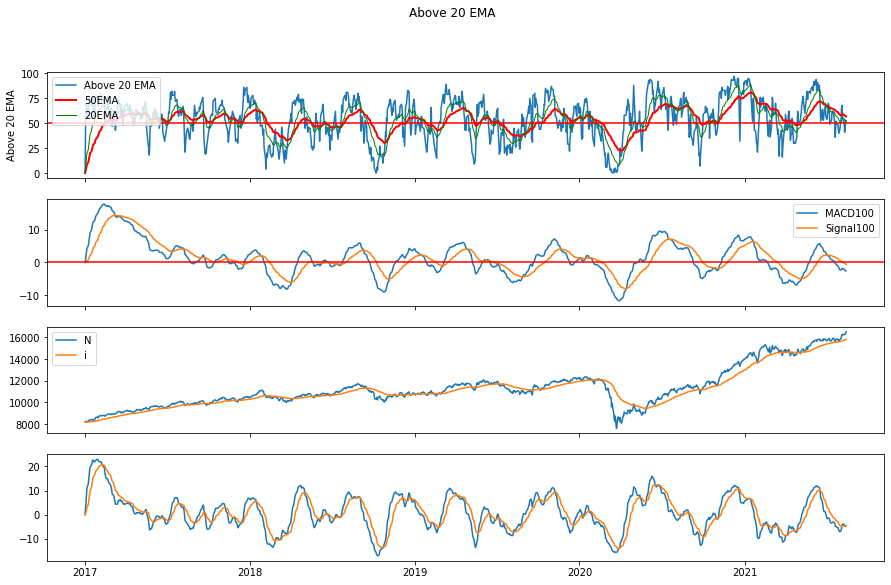

In [11]:
draw_plot('Above 20 EMA',df,nifty)


#nifty 100 above 50 dma

In [12]:
df=get_indicators(50)  #50,20,15

In [13]:
 buy,sell,buy20,sell20=plot_buy_sell_signal(df)

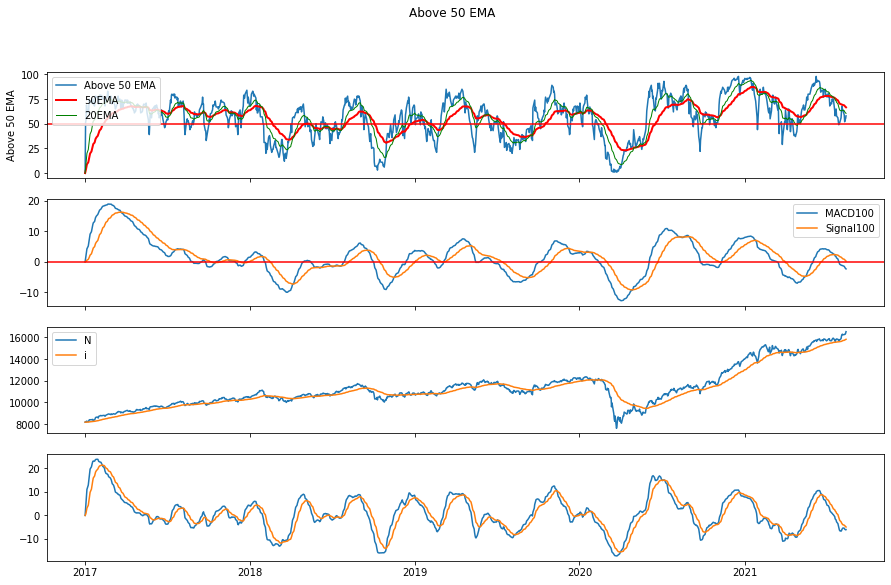

In [14]:
draw_plot('Above 50 EMA',df,nifty)

#nifty 100 above 200 dma

In [15]:
textstr='Buy Signal Below 0 line of MACD invariably Works'

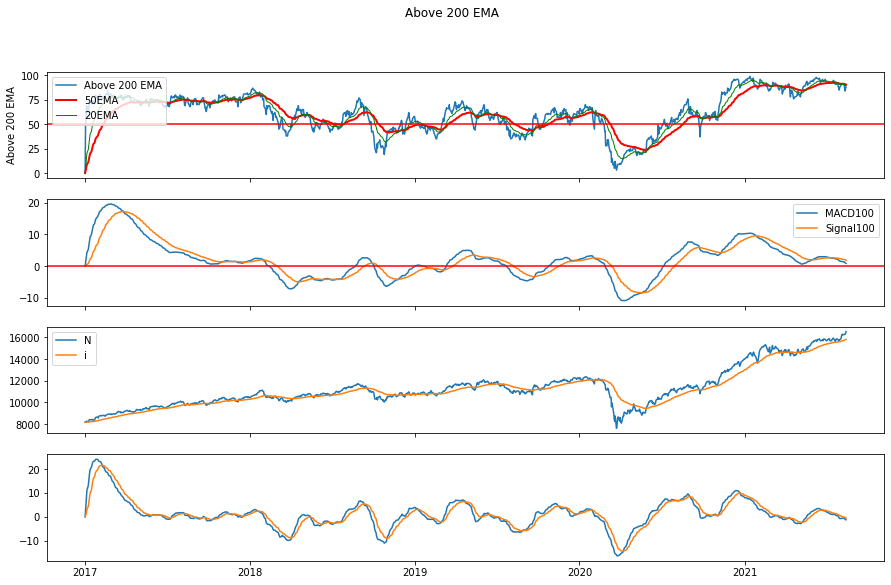

In [16]:
df=get_indicators(200)
buy,sell,buy20,sell20=plot_buy_sell_signal(df)
draw_plot('Above 200 EMA',df,nifty)


In [17]:

sample= nifty.join(df , how='inner',rsuffix='right')

In [18]:
sample['sum_diff']=sample['sum'].diff(90)


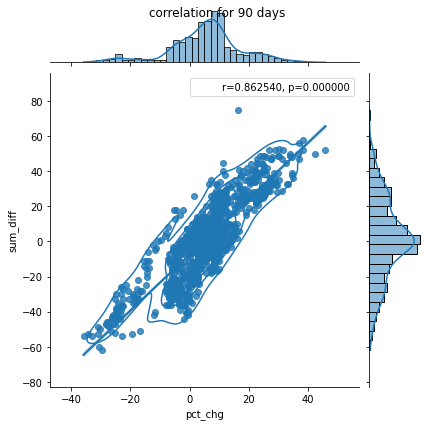

In [19]:
from scipy.stats import pearsonr
g=sns.jointplot(x='pct_chg',y='sum_diff',data=sample,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(sample['pct_chg'][-800:], sample['macd'][-800:])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.suptitle('correlation for 90 days')
plt.show()

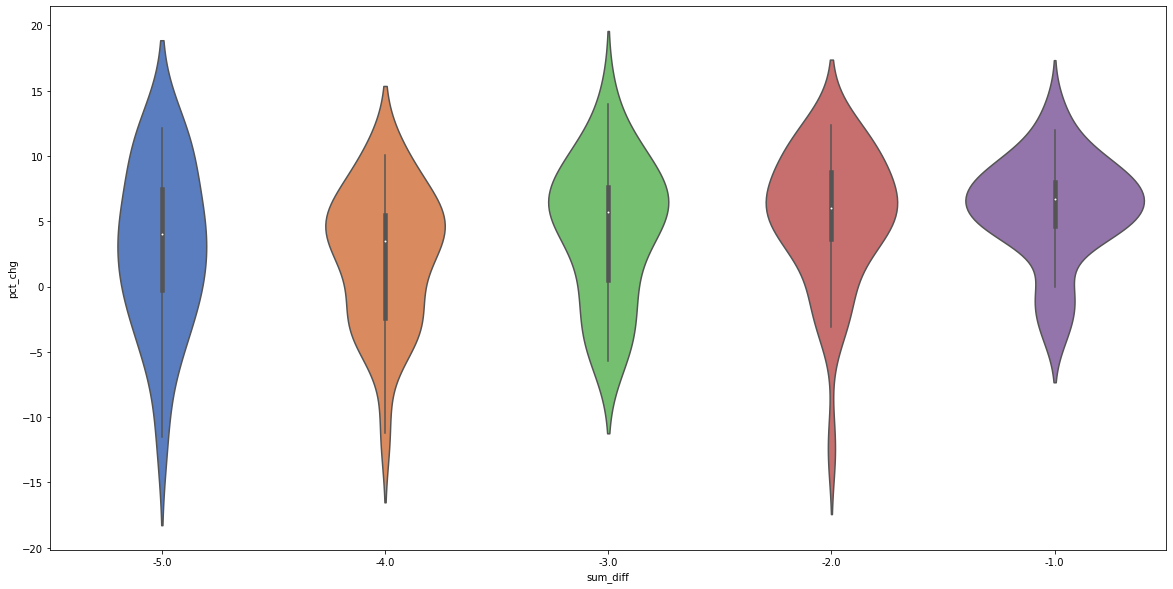

In [20]:
plt.figure(figsize=(20,10))
sns.violinplot(x='sum_diff',y='pct_chg',data=sample[(sample['sum_diff'] >= -5) & (sample['sum_diff'] <= -1)], palette="muted") # 
plt.show()

# LIX 15 STRENGTH

In [21]:
lix15 =['ADANIPORTS.NS','AXISBANK.NS','BAJFINANCE.NS','BHARTIARTL.NS','HDFCBANK.NS','INDUSINDBK.NS','IOC.NS','MARUTI.NS','ONGC.NS','POWERGRID.NS','RELIANCE.NS','SBIN.NS','SUNPHARMA.NS','TATASTEEL.NS','ULTRACEMCO.NS',]

lix=[]
for i in range(15):
  lxi = yf.download(lix15[i], start=START)
  
  lxi = lxi.dropna()
  
  lix.append(lxi)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

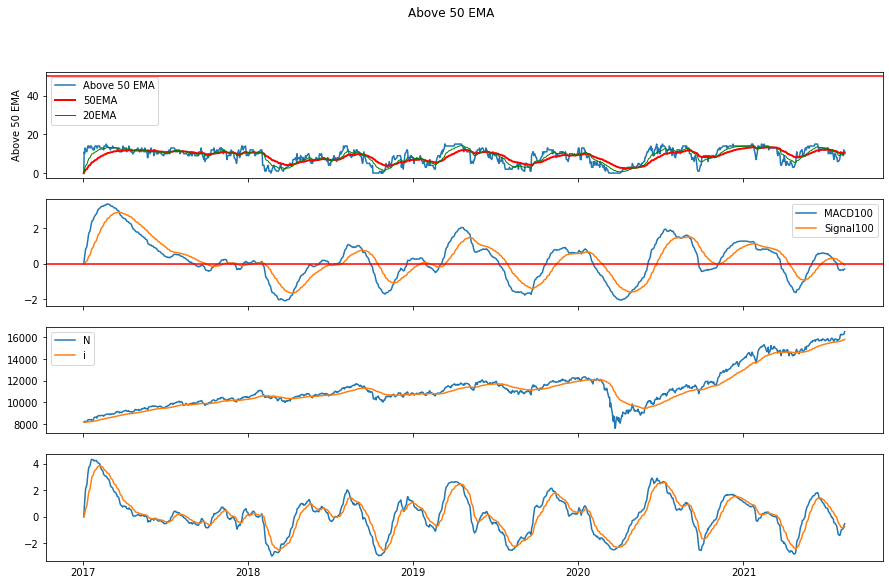

In [22]:
df=get_indicators(50,lix)
buy,sell,buy20,sell20=plot_buy_sell_signal(df)
draw_plot('Above 50 EMA',df,nifty)

In [23]:
df1=get_indicators(20)

In [24]:
df2=get_indicators(50)

In [25]:
df3=get_indicators(200)

In [26]:
combined = pd.concat([df1['sum'],df2['sum'],df3['sum']],axis=1)

In [27]:
combined.columns =['ema20','ema50','ema200']

In [28]:
combined['total']=combined['ema20']*1+combined['ema50']*2+combined['ema200']*3

In [29]:
import pandas as pd
from sklearn import preprocessing

x = combined.total.values.reshape(-1,1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [30]:
df_f=pd.concat([combined.reset_index().Date,df*100],axis=1)

In [31]:
df_f.set_index('Date',inplace=True)
df_f.columns=['sum']

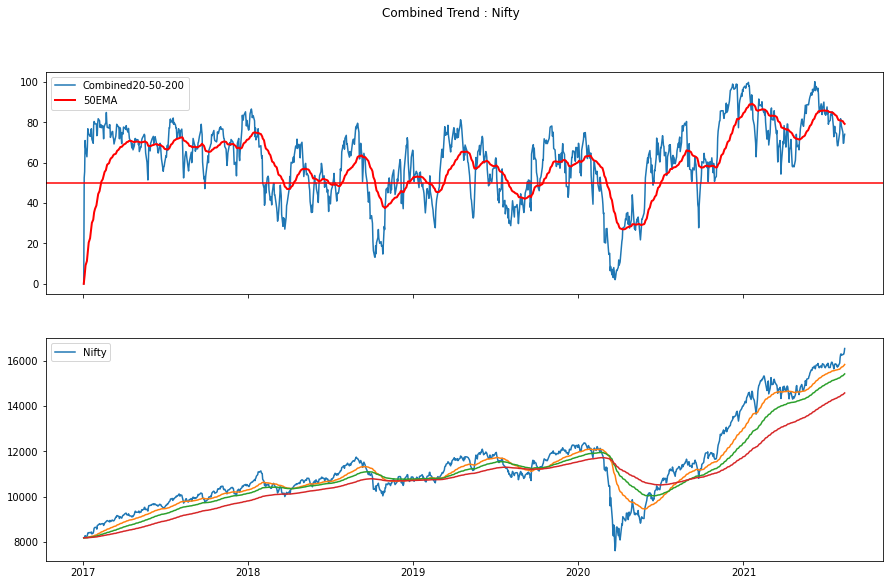

In [32]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(df_f.loc[:, :].index, df_f.loc[:, 'sum'],label='Combined20-50-200')
ax[1].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
ax[0].axhline(y=50 , color ='r')
#ax[1].plot(nifty['Close'].ewm(span=20, adjust=False).mean())
ax[1].plot(nifty['Close'].ewm(span=50, adjust=False).mean())
ax[1].plot(nifty['Close'].ewm(span=100, adjust=False).mean())
#ax[1].plot(nifty['Close'].ewm(span=150, adjust=False).mean())
ax[1].plot(nifty['Close'].ewm(span=200, adjust=False).mean())
ax[0].plot(df_f['sum'].ewm(span=50, adjust=False).mean(),linewidth=2, markersize=4 ,label='50EMA' ,color='r')
#ax[0].plot(df_f['sum'].ewm(span=10, adjust=False).mean(),linewidth=1, markersize=4 ,label='20EMA' ,color='g')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.suptitle('Combined Trend : Nifty')
plt.show()